# Installing the required Libraries

In [178]:
#!pip install emoji
#!pip install gensim
#!pip install wordcloud
#!pip install pyLDAvis
#!pip install collection
#!pip install Levenshtein

***Twitter Data Authorization***

In [79]:
import tweepy
import csv
import pandas as pd
import re
import collections
import numpy as np
import emoji
import nltk
import time
import itertools
import string
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import gensim
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
warnings.filterwarnings("ignore")
nltk.download('words')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
words = set(nltk.corpus.words.words())
consumer_key = "geEJcxN9JoOR8iDSPHi7l3jBP"
consumer_secret = "Q0cOl7yOeoE1uGx6Asv7XoGFrdXqt84hwh6eHguBt8OZj7PXLn"
access_token = "1352308372658413568-XPrGLnfC6zrrVA2Z4chjNAnDpXfQWy"
access_token_secret = "SrILIh1KG91ehpfZDESrfpqIoHBdu9aMAgyJKfJA0TcBx"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akshitakhatri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshitakhatri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/akshitakhatri/nltk_data...
[nltk_data]   Package words is already up-to-date!


# Data collection

In [2]:
username = 'CTVToronto'
count = 4000

tweets_list = []
try:     
    print('Tweets scraping from', username,'account..')
    tweets = tweepy.Cursor(api.user_timeline,id=username, tweet_mode='extended').items(count)

    # Pulling information from tweets iterable object
#     tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets]
        
    columns = ['username','created_at',
               'tweet', 'hashtags']
   

    tweets_count = 0
    
    for tweet in tweets:
        tweets_count = tweet.user.statuses_count
        break
        
    print("Id",username,"tweeted",tweets_count,"tweets ever since.")
    # for tweet in tweet_list:
    tweets_list = [[tweet.user.screen_name,
                    tweet.created_at, tweet.full_text,
                    tweet.entities['hashtags']] for tweet in tweets]
    
    print('Total tweets fetched:',len(tweets_list))
    
    df = pd.DataFrame(tweets_list, columns=columns)
    print('DataFrame shape:',df.shape)
    print('Tweets Fetched Successfully..')
except BaseException as e:
      print('failed to fetch tweets, on_status,',str(e))
time.sleep(3)

Tweets scraping from CTVToronto account..
Id CTVToronto tweeted 133357 tweets ever since.
Total tweets fetched: 3248
DataFrame shape: (3248, 4)
Tweets Fetched Successfully..


In [3]:
df.to_csv('CTV.csv',index = False, header = True)

In [4]:
df

,username,created_at,tweet,hashtags
0,CTVToronto,2021-07-29 17:13:58,"The concert, originally set to take place in 2...",[]
1,CTVToronto,2021-07-29 16:35:07,One of the key targets has been hit. Here's wh...,[]
2,CTVToronto,2021-07-29 14:24:56,#BREAKING: Ontario health officials are report...,"[{'text': 'BREAKING', 'indices': [0, 9]}]"
3,CTVToronto,2021-07-29 14:02:54,One of Toronto’s most prominent restaurant own...,[]
4,CTVToronto,2021-07-29 13:50:33,The Toronto Police Service (TPS) has named a s...,[]
...,...,...,...,...
3243,CTVToronto,2021-05-08 02:30:10,As Ontario's COVID-19 case numbers appear to h...,[]
3244,CTVToronto,2021-05-07 22:41:37,“The risk of Lyme disease is quite prevalent i...,[]
3245,CTVToronto,2021-05-07 22:09:21,It took a month of hard work for the grade 10 ...,[]
3246,CTVToronto,2021-05-07 21:36:46,Here's what's coming up at six on CTV News Tor...,[]


# ***Pre-processing text data***


Remove punctuations

Tokenization - Converting a sentence into list of words

Remove stopwords

Lammetization/stemming - Tranforming any form of a word to its root word

In [5]:
string.punctuation # removing all these string punctuations from the tweet

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    text =''.join(c for c in text if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    text = re.sub(r"http\S+", "", text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    return text

df['Tweet_punct'] = df['tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,username,created_at,tweet,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,CTVToronto,2021-07-29 17:13:58,"The concert, originally set to take place in 2...",[],The concert originally set to take place in i...,"[the, concert, originally, set, to, take, plac...","[concert, originally, set, take, place, schedu...","[concert, origin, set, take, place, schedul, a...","[concert, originally, set, take, place, schedu..."
1,CTVToronto,2021-07-29 16:35:07,One of the key targets has been hit. Here's wh...,[],One of the key targets has been hit Heres what...,"[one, of, the, key, targets, has, been, hit, h...","[one, key, targets, hit, heres, still, needs, ...","[one, key, target, hit, here, still, need, acc...","[one, key, target, hit, here, still, need, acc..."
2,CTVToronto,2021-07-29 14:24:56,#BREAKING: Ontario health officials are report...,"[{'text': 'BREAKING', 'indices': [0, 9]}]",BREAKING Ontario health officials are reportin...,"[breaking, ontario, health, officials, are, re...","[breaking, ontario, health, officials, reporti...","[break, ontario, health, offici, report, jump,...","[breaking, ontario, health, official, reportin..."
3,CTVToronto,2021-07-29 14:02:54,One of Toronto’s most prominent restaurant own...,[],One of Toronto’s most prominent restaurant own...,"[one, of, toronto, s, most, prominent, restaur...","[one, toronto, prominent, restaurant, owners, ...","[one, toronto, promin, restaur, owner, call, r...","[one, toronto, prominent, restaurant, owner, c..."
4,CTVToronto,2021-07-29 13:50:33,The Toronto Police Service (TPS) has named a s...,[],The Toronto Police Service TPS has named a sus...,"[the, toronto, police, service, tps, has, name...","[toronto, police, service, tps, named, suspect...","[toronto, polic, servic, tp, name, suspect, in...","[toronto, police, service, tps, named, suspect..."
5,CTVToronto,2021-07-29 11:50:18,LISTEN: Episode 4 of Life Unmasked is out now ...,[],LISTEN Episode of Life Unmasked is out now 🎶\...,"[listen, episode, of, life, unmasked, is, out,...","[listen, episode, life, unmasked, week, dive, ...","[listen, episod, life, unmask, week, dive, wor...","[listen, episode, life, unmasked, week, dive, ..."
6,CTVToronto,2021-07-29 10:00:09,Police have released images of five suspects w...,[],Police have released images of five suspects w...,"[police, have, released, images, of, five, sus...","[police, released, images, five, suspects, wan...","[polic, releas, imag, five, suspect, want, con...","[police, released, image, five, suspect, wante..."
7,CTVToronto,2021-07-29 09:30:07,Ontario Premier Doug Ford has confirmed a back...,[],Ontario Premier Doug Ford has confirmed a back...,"[ontario, premier, doug, ford, has, confirmed,...","[ontario, premier, doug, ford, confirmed, back...","[ontario, premier, doug, ford, confirm, backto...","[ontario, premier, doug, ford, confirmed, back..."
8,CTVToronto,2021-07-29 09:00:23,The general manager of an Ontario retirement h...,[],The general manager of an Ontario retirement h...,"[the, general, manager, of, an, ontario, retir...","[general, manager, ontario, retirement, home, ...","[gener, manag, ontario, retir, home, face, con...","[general, manager, ontario, retirement, home, ..."
9,CTVToronto,2021-07-29 08:30:07,As air travel slowly ramps up again with COVID...,[],As air travel slowly ramps up again with COVID...,"[as, air, travel, slowly, ramps, up, again, wi...","[air, travel, slowly, ramps, covid, restrictio...","[air, travel, slowli, ramp, covid, restrict, e...","[air, travel, slowly, ramp, covid, restriction..."


In [41]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

<>:2: DeprecationWarning: invalid escape sequence \W
<>:2: DeprecationWarning: invalid escape sequence \W
/var/folders/42/bdt3r3td7fj637fbj47fl3vh0000gn/T/ipykernel_953/936078128.py:2: DeprecationWarning: invalid escape sequence \W
  text = re.split('\W+', text)


,username,created_at,tweet,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,CTVToronto,2021-07-29 17:13:58,"The concert, originally set to take place in 2...",[],The concert originally set to take place in i...,"[the, concert, originally, set, to, take, plac...","[concert, originally, set, take, place, schedu...","[concert, origin, set, take, place, schedul, a...","[concert, originally, set, take, place, schedu..."
1,CTVToronto,2021-07-29 16:35:07,One of the key targets has been hit. Here's wh...,[],One of the key targets has been hit Heres what...,"[one, of, the, key, targets, has, been, hit, h...","[one, key, targets, hit, heres, still, needs, ...","[one, key, target, hit, here, still, need, acc...","[one, key, target, hit, here, still, need, acc..."
2,CTVToronto,2021-07-29 14:24:56,#BREAKING: Ontario health officials are report...,"[{'text': 'BREAKING', 'indices': [0, 9]}]",BREAKING Ontario health officials are reportin...,"[breaking, ontario, health, officials, are, re...","[breaking, ontario, health, officials, reporti...","[break, ontario, health, offici, report, jump,...","[breaking, ontario, health, official, reportin..."
3,CTVToronto,2021-07-29 14:02:54,One of Toronto’s most prominent restaurant own...,[],One of Toronto’s most prominent restaurant own...,"[one, of, toronto, s, most, prominent, restaur...","[one, toronto, prominent, restaurant, owners, ...","[one, toronto, promin, restaur, owner, call, r...","[one, toronto, prominent, restaurant, owner, c..."
4,CTVToronto,2021-07-29 13:50:33,The Toronto Police Service (TPS) has named a s...,[],The Toronto Police Service TPS has named a sus...,"[the, toronto, police, service, tps, has, name...","[toronto, police, service, tps, named, suspect...","[toronto, polic, servic, tp, name, suspect, in...","[toronto, police, service, tps, named, suspect..."


In [42]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,username,created_at,tweet,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,CTVToronto,2021-07-29 17:13:58,"The concert, originally set to take place in 2...",[],The concert originally set to take place in i...,"[the, concert, originally, set, to, take, plac...","[concert, originally, set, take, place, schedu...","[concert, origin, set, take, place, schedul, a...","[concert, originally, set, take, place, schedu..."
1,CTVToronto,2021-07-29 16:35:07,One of the key targets has been hit. Here's wh...,[],One of the key targets has been hit Heres what...,"[one, of, the, key, targets, has, been, hit, h...","[one, key, targets, hit, heres, still, needs, ...","[one, key, target, hit, here, still, need, acc...","[one, key, target, hit, here, still, need, acc..."
2,CTVToronto,2021-07-29 14:24:56,#BREAKING: Ontario health officials are report...,"[{'text': 'BREAKING', 'indices': [0, 9]}]",BREAKING Ontario health officials are reportin...,"[breaking, ontario, health, officials, are, re...","[breaking, ontario, health, officials, reporti...","[break, ontario, health, offici, report, jump,...","[breaking, ontario, health, official, reportin..."
3,CTVToronto,2021-07-29 14:02:54,One of Toronto’s most prominent restaurant own...,[],One of Toronto’s most prominent restaurant own...,"[one, of, toronto, s, most, prominent, restaur...","[one, toronto, prominent, restaurant, owners, ...","[one, toronto, promin, restaur, owner, call, r...","[one, toronto, prominent, restaurant, owner, c..."
4,CTVToronto,2021-07-29 13:50:33,The Toronto Police Service (TPS) has named a s...,[],The Toronto Police Service TPS has named a sus...,"[the, toronto, police, service, tps, has, name...","[toronto, police, service, tps, named, suspect...","[toronto, polic, servic, tp, name, suspect, in...","[toronto, police, service, tps, named, suspect..."


In [43]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,username,created_at,tweet,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,CTVToronto,2021-07-29 17:13:58,"The concert, originally set to take place in 2...",[],The concert originally set to take place in i...,"[the, concert, originally, set, to, take, plac...","[concert, originally, set, take, place, schedu...","[concert, origin, set, take, place, schedul, a...","[concert, originally, set, take, place, schedu..."
1,CTVToronto,2021-07-29 16:35:07,One of the key targets has been hit. Here's wh...,[],One of the key targets has been hit Heres what...,"[one, of, the, key, targets, has, been, hit, h...","[one, key, targets, hit, heres, still, needs, ...","[one, key, target, hit, here, still, need, acc...","[one, key, target, hit, here, still, need, acc..."
2,CTVToronto,2021-07-29 14:24:56,#BREAKING: Ontario health officials are report...,"[{'text': 'BREAKING', 'indices': [0, 9]}]",BREAKING Ontario health officials are reportin...,"[breaking, ontario, health, officials, are, re...","[breaking, ontario, health, officials, reporti...","[break, ontario, health, offici, report, jump,...","[breaking, ontario, health, official, reportin..."
3,CTVToronto,2021-07-29 14:02:54,One of Toronto’s most prominent restaurant own...,[],One of Toronto’s most prominent restaurant own...,"[one, of, toronto, s, most, prominent, restaur...","[one, toronto, prominent, restaurant, owners, ...","[one, toronto, promin, restaur, owner, call, r...","[one, toronto, prominent, restaurant, owner, c..."
4,CTVToronto,2021-07-29 13:50:33,The Toronto Police Service (TPS) has named a s...,[],The Toronto Police Service TPS has named a sus...,"[the, toronto, police, service, tps, has, name...","[toronto, police, service, tps, named, suspect...","[toronto, polic, servic, tp, name, suspect, in...","[toronto, police, service, tps, named, suspect..."


In [44]:
Wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [Wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,username,created_at,tweet,hashtags,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,CTVToronto,2021-07-29 17:13:58,"The concert, originally set to take place in 2...",[],The concert originally set to take place in i...,"[the, concert, originally, set, to, take, plac...","[concert, originally, set, take, place, schedu...","[concert, origin, set, take, place, schedul, a...","[concert, originally, set, take, place, schedu..."
1,CTVToronto,2021-07-29 16:35:07,One of the key targets has been hit. Here's wh...,[],One of the key targets has been hit Heres what...,"[one, of, the, key, targets, has, been, hit, h...","[one, key, targets, hit, heres, still, needs, ...","[one, key, target, hit, here, still, need, acc...","[one, key, target, hit, here, still, need, acc..."
2,CTVToronto,2021-07-29 14:24:56,#BREAKING: Ontario health officials are report...,"[{'text': 'BREAKING', 'indices': [0, 9]}]",BREAKING Ontario health officials are reportin...,"[breaking, ontario, health, officials, are, re...","[breaking, ontario, health, officials, reporti...","[break, ontario, health, offici, report, jump,...","[breaking, ontario, health, official, reportin..."
3,CTVToronto,2021-07-29 14:02:54,One of Toronto’s most prominent restaurant own...,[],One of Toronto’s most prominent restaurant own...,"[one, of, toronto, s, most, prominent, restaur...","[one, toronto, prominent, restaurant, owners, ...","[one, toronto, promin, restaur, owner, call, r...","[one, toronto, prominent, restaurant, owner, c..."
4,CTVToronto,2021-07-29 13:50:33,The Toronto Police Service (TPS) has named a s...,[],The Toronto Police Service TPS has named a sus...,"[the, toronto, police, service, tps, has, name...","[toronto, police, service, tps, named, suspect...","[toronto, polic, servic, tp, name, suspect, in...","[toronto, police, service, tps, named, suspect..."


In [45]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

<>:4: DeprecationWarning: invalid escape sequence \W
<>:4: DeprecationWarning: invalid escape sequence \W
/var/folders/42/bdt3r3td7fj637fbj47fl3vh0000gn/T/ipykernel_953/1724921860.py:4: DeprecationWarning: invalid escape sequence \W
  tokens = re.split('\W+', text_rc)    # tokenization


In [46]:
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

3248 Number of tweets has 7452 words


In [47]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akshitakhatri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Applying LDA model 


In [48]:
# full vocabulary of tweets with corpus 
all_words = [word for tokens in df['tweet'] for word in tokens]
tweet_lengths = [len(tokens) for tokens in df['tweet']]
vocab = sorted(list(set(all_words)))

print('{} words total, with a vocabulary size of {}'.format(len(all_words), len(vocab)))
print('Max tweet length is {}'.format(max(tweet_lengths)))

485359 words total, with a vocabulary size of 107
Max tweet length is 301


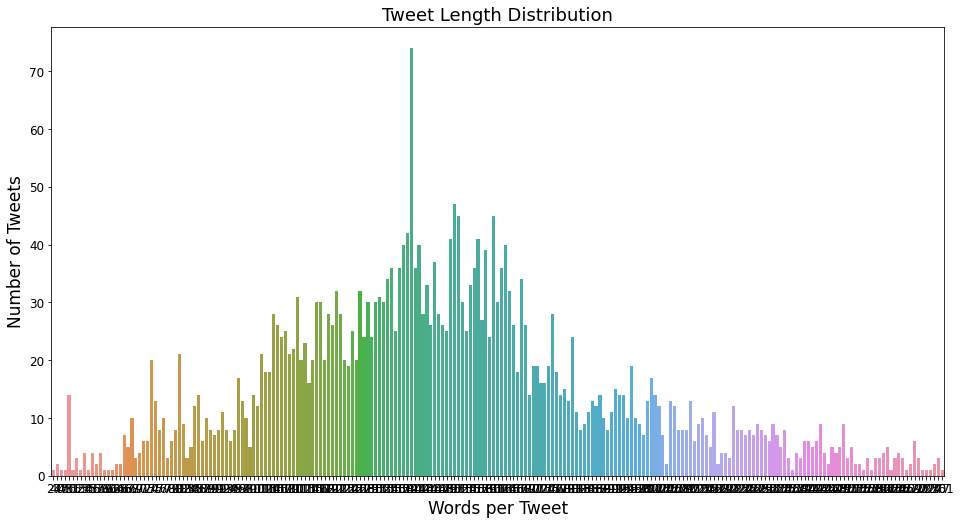

In [49]:
plt.figure(figsize = (16,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('Words per Tweet', fontsize = 17)
plt.ylabel('Number of Tweets', fontsize = 17)
plt.show()

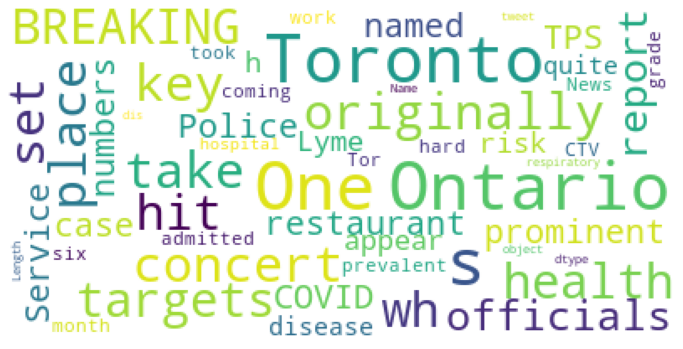

In [50]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['figure.figsize']=(12.0,12.0)  
plt.rcParams['font.size']=12            
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(df.tweet))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [51]:
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(
analyzer='word',       
min_df=3,# minimum required occurences of a word 
stop_words='english',# remove stop words
lowercase=True,# convert all words to lowercase
token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
max_features=5000,# max number of unique words
                            )
data_matrix = vectorizer.fit_transform(df.tweet)
data_matrix

<3248x2393 sparse matrix of type '<class 'numpy.int64'>'
	with 36298 stored elements in Compressed Sparse Row format>

In [52]:
lda_model = LatentDirichletAllocation(
n_components=10, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_matrix)

In [53]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from im

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
8      32.420952   8.115230       1        1  13.890362
5       0.648955  71.707100       2        1  13.740321
6      71.019684   9.971006       3        1  13.337797
7       3.785981  33.185135       4        1  12.668011
1     -42.666500  -9.222070       5        1  10.442005
0      -3.621689 -43.526516       6        1   8.525339
9      -3.632402  -4.171708       7        1   7.908641
4     -36.584400  35.804413       8        1   6.689695
3      44.391380  50.615383       9        1   6.406091
2      40.235809 -31.591665      10        1   6.391738, topic_info=          Term        Freq       Total Category  logprob  loglift
508      covid  492.000000  492.000000  Default  30.0000  30.0000
2168   toronto  802.000000  802.000000  Default  29.0000  29.0000
1592    police  454.000000  454.000000  Default  28.0000  28.0000
2268   vaccine  210.000000  210.000000  Default  27.0000  27.0000
1469   ontario  763.000000  763.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
1469   ontario   79.539945  763.443911  Topic10  -3.3874   0.4886
508      covid   59.830159  492.538016  Topic10  -3.6721   0.6421
965     health   25.538505  191.527029  Topic10  -4.5235   0.7353
325   canadian   16.272742   45.617719  Topic10  -4.9742   1.7194
1857      said   19.100958  115.863603  Topic10  -4.8139   0.9475

[500 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.579784    000
0         4  0.086968    000
0         5  0.135283    000
0         9  0.202924    000
22        8  0.941725    400
...     ...       ...    ...
2380      8  0.042784   year
2381      4  0.355025  years
2381      8  0.626514  years
2383      3  0.747076   york
2383      8  0.240992   york

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 7, 8, 2, 1, 10, 5, 4, 3])

In [54]:
def lemmatize_stemming(text):
#     snowballStemm_ = SnowballStemmer()
    ps = PorterStemmer()
    return ps.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [55]:
data_text = df[['tweet']]
documents = data_text
data_text['index'] = data_text.index
documents = data_text

In [56]:
print(len(documents))
print((documents[:5]))

3248
                                               tweet  index
0  The concert, originally set to take place in 2...      0
1  One of the key targets has been hit. Here's wh...      1
2  #BREAKING: Ontario health officials are report...      2
3  One of Toronto’s most prominent restaurant own...      3
4  The Toronto Police Service (TPS) has named a s...      4


# For preprocessing selecting a document to preview 

In [57]:
doc_sample = documents[documents.index == 1].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['One', 'of', 'the', 'key', 'targets', 'has', 'been', 'hit.', "Here's", 'what', 'still', 'needs', 'to', 'be', 'accomplished.\n\nhttps://t.co/wk4ihaIdzR']


 tokenized and lemmatized document: 
['target', 'need', 'accomplish', 'http', 'ihaidzr']


In [36]:
pre_processed_docs = documents['tweet'].apply(preprocess)
pre_processed_docs[:10]

0    [concert, origin, place, schedul, buffalo, can...
1            [target, need, accomplish, http, ihaidzr]
2    [break, ontario, health, offici, report, jump,...
3    [toronto, promin, restaur, owner, call, recent...
4    [toronto, polic, servic, name, suspect, invest...
5    [listen, episod, life, unmask, week, dive, wor...
6    [polic, releas, imag, suspect, want, connect, ...
7    [ontario, premier, doug, ford, confirm, school...
8    [gener, manag, ontario, retir, home, face, con...
9    [travel, slowli, ramp, covid, restrict, eas, t...
Name: tweet, dtype: object

# **Applying Bag of Words on the Data set**

Step 1: Convert the above sentences in lower case as the case of the word does not hold any information.(do the preprcessing of the text)

Step 2: Remove special characters and stopwords from the text. Stopwords are the words that do not contain much information about text like ‘is’, ‘a’,’the and many more’.

After applying the above steps,

Step 3: Go through all the words in the above text and make a list of all of the words in our model vocabulary.

In [151]:
text_dictionary = gensim.corpora.Dictionary(pre_processed_docs)
count = 0
for j, v in text_dictionary.iteritems():
    print(j, v)
    count += 1
    if count > 20:
        break
        


0 border
1 buffalo
2 canada
3 concert
4 current
5 extend
6 http
7 land
8 origin
9 place
10 restrict
11 schedul
12 szljdzk
13 accomplish
14 ihaidzr
15 need
16 target
17 break
18 case
19 covid
20 health


In [152]:
text_dictionary.filter_extremes(no_below=20, no_above=1.0, keep_n=150000)

In [153]:
tweets_bow = [text_dictionary.doc2bow(doc) for doc in pre_processed_docs]
tweets_bow[100]

[(3, 1),
 (10, 1),
 (11, 1),
 (14, 1),
 (50, 1),
 (52, 1),
 (54, 1),
 (55, 1),
 (56, 2),
 (73, 1),
 (111, 1),
 (131, 1),
 (187, 1),
 (188, 1),
 (189, 1),
 (190, 1)]

In [154]:
bow_100 = tweets_bow[100]
for i in range(len(bow_100)):
    print("Word {} (\"{}\") appears {} time.".format(bow_100[i][0], 
                                               dictionary[bow_100[i][0]], 
bow_100[i][1]))


Word 3 ("http") appears 1 time.
Word 10 ("covid") appears 1 time.
Word 11 ("health") appears 1 time.
Word 14 ("ontario") appears 1 time.
Word 50 ("doug") appears 1 time.
Word 52 ("ford") appears 1 time.
Word 54 ("premier") appears 1 time.
Word 55 ("provinc") appears 1 time.
Word 56 ("say") appears 2 time.
Word 73 ("vaccin") appears 1 time.
Word 111 ("care") appears 1 time.
Word 131 ("support") appears 1 time.
Word 187 ("monday") appears 1 time.
Word 188 ("stop") appears 1 time.
Word 189 ("test") appears 1 time.
Word 190 ("worker") appears 1 time.


In [155]:
from gensim import corpora, models
from pprint import pprint

tfidf = models.TfidfModel(tweets_bow)
corpus_tfidf = tfidf[tweets_bow]
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5126561613503481),
 (1, 0.33275433968024837),
 (2, 0.5050081027600705),
 (3, 0.0016604006701363351),
 (4, 0.44886967532289096),
 (5, 0.41223571345202337)]


# Running LDA using Bag of Words

In [337]:
from gensim.models.ldamodel import LdaModel


for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
tweets_lda = LdaModel(tweets_bow,num_topics = 10,id2word = text_dictionary,random_state = 1,passes=10)
  


Topic: 0 
Words: 0.139*"http" + 0.051*"toronto" + 0.023*"year" + 0.019*"covid" + 0.019*"vaccin" + 0.015*"polic" + 0.015*"pandem" + 0.015*"peopl" + 0.015*"ontario" + 0.013*"news"
Topic: 1 
Words: 0.145*"http" + 0.062*"toronto" + 0.035*"polic" + 0.016*"saturday" + 0.015*"school" + 0.015*"news" + 0.014*"year" + 0.013*"miss" + 0.012*"canada" + 0.011*"ontario"
Topic: 2 
Words: 0.109*"http" + 0.081*"ontario" + 0.065*"covid" + 0.053*"case" + 0.046*"report" + 0.043*"break" + 0.026*"offici" + 0.024*"health" + 0.018*"say" + 0.017*"death"
Topic: 3 
Words: 0.116*"http" + 0.044*"say" + 0.034*"ontario" + 0.030*"govern" + 0.025*"vaccin" + 0.022*"health" + 0.021*"dose" + 0.014*"second" + 0.014*"peopl" + 0.014*"week"
Topic: 4 
Words: 0.127*"http" + 0.042*"polic" + 0.030*"toronto" + 0.025*"year" + 0.018*"ontario" + 0.015*"hospit" + 0.014*"say" + 0.014*"connect" + 0.013*"investig" + 0.012*"vaccin"
Topic: 5 
Words: 0.129*"http" + 0.062*"toronto" + 0.031*"vaccin" + 0.029*"covid" + 0.026*"resid" + 0.016*"on

# Running LDA using TF-IDF

In [160]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))


Topic: 0 Word: 0.017*"pandem" + 0.013*"polic" + 0.013*"year" + 0.012*"ontario" + 0.012*"shoot" + 0.012*"covid" + 0.012*"toronto" + 0.012*"hospit" + 0.012*"crash" + 0.012*"say"
Topic: 1 Word: 0.021*"vaccin" + 0.020*"covid" + 0.019*"need" + 0.018*"ontario" + 0.017*"toronto" + 0.015*"miss" + 0.013*"newscast" + 0.013*"case" + 0.013*"news" + 0.013*"second"
Topic: 2 Word: 0.033*"news" + 0.030*"come" + 0.027*"toronto" + 0.018*"ontario" + 0.015*"polic" + 0.013*"canadian" + 0.013*"woman" + 0.011*"covid" + 0.011*"summer" + 0.010*"nearli"
Topic: 3 Word: 0.029*"http" + 0.019*"ontario" + 0.018*"step" + 0.017*"reopen" + 0.015*"plan" + 0.014*"long" + 0.014*"ford" + 0.013*"year" + 0.012*"tell" + 0.011*"premier"
Topic: 4 Word: 0.026*"ontario" + 0.021*"say" + 0.019*"time" + 0.018*"order" + 0.017*"charg" + 0.013*"show" + 0.013*"govern" + 0.012*"toronto" + 0.012*"month" + 0.011*"polic"
Topic: 5 Word: 0.023*"peopl" + 0.022*"dose" + 0.018*"vaccin" + 0.015*"covid" + 0.014*"toronto" + 0.014*"updat" + 0.013*"p

In [161]:
for index, score in sorted(lda_model[tweets_bow[100]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.9499877691268921	 
Topic: 0.116*"http" + 0.044*"say" + 0.034*"ontario" + 0.030*"govern" + 0.025*"vaccin" + 0.022*"health" + 0.021*"dose" + 0.014*"second" + 0.014*"peopl" + 0.014*"week"


# Testing model on a random tweet

In [162]:
unseen_document = 'Youth #COVID19 clinics are happening this #longweekend! '
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.7749165296554565	 Topic: 0.129*"http" + 0.062*"toronto" + 0.031*"vaccin" + 0.029*"covid" + 0.026*"resid"
Score: 0.025014728307724	 Topic: 0.116*"http" + 0.044*"say" + 0.034*"ontario" + 0.030*"govern" + 0.025*"vaccin"
Score: 0.02501416765153408	 Topic: 0.144*"http" + 0.047*"ontario" + 0.025*"reopen" + 0.017*"live" + 0.017*"toronto"
Score: 0.02501034364104271	 Topic: 0.145*"http" + 0.062*"toronto" + 0.035*"polic" + 0.016*"saturday" + 0.015*"school"
Score: 0.025009701028466225	 Topic: 0.139*"http" + 0.051*"toronto" + 0.023*"year" + 0.019*"covid" + 0.019*"vaccin"
Score: 0.025009075179696083	 Topic: 0.109*"http" + 0.081*"ontario" + 0.065*"covid" + 0.053*"case" + 0.046*"report"
Score: 0.02500731311738491	 Topic: 0.116*"http" + 0.052*"ontario" + 0.051*"vaccin" + 0.033*"covid" + 0.027*"toronto"
Score: 0.025006264448165894	 Topic: 0.127*"http" + 0.046*"toronto" + 0.032*"polic" + 0.018*"kill" + 0.018*"ontario"
Score: 0.025006085634231567	 Topic: 0.127*"http" + 0.042*"polic" + 0.030*"tor

#  Display the related tweets  queried by the  user 

In [340]:
def fetchWords(model):
    x=model.show_topics(num_topics=10, num_words=10,formatted=False)
    topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

    top_10 = ""
    #Below Code Prints Only Words 
    for topic,words in topics_words:
        top_10 = top_10+" ".join(words)
    return top_10

def displayWordCloud(data):
    wordcloud = WordCloud(stopwords=STOPWORDS, max_words=1000).generate(data)
    # rcParams['figure.figsize'] = 10, 20
    plt.figure(figsize =(20, 7) )

    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

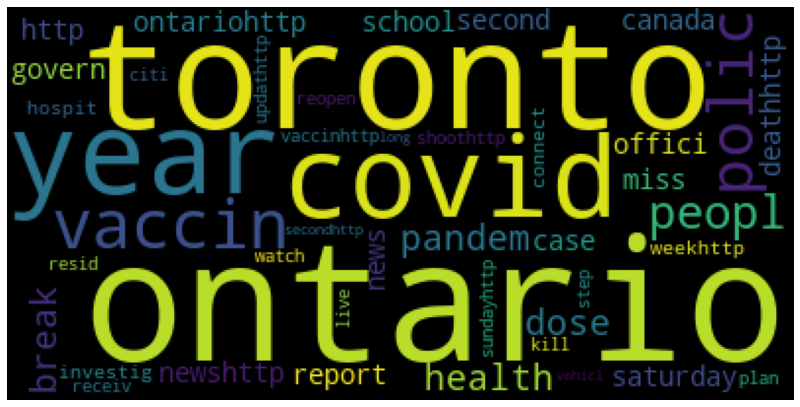

In [341]:
lda_bow_data = fetchWords(lda_model)
displayWordCloud(lda_bow_data)

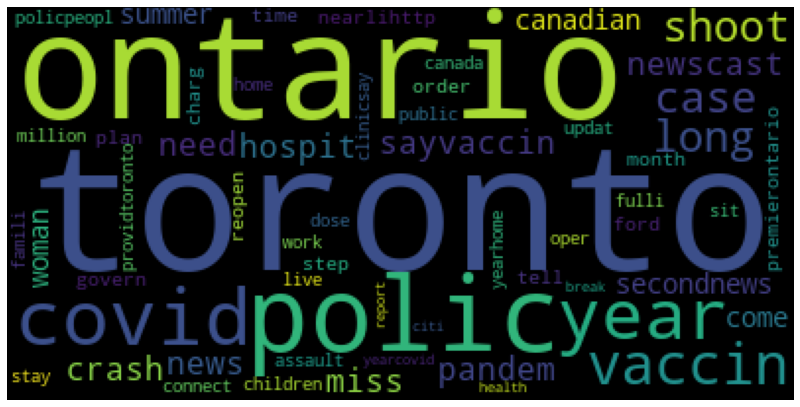

In [165]:
lda_tfidf_data = fetchWords(lda_model_tfidf)
displayWordCloud(lda_tfidf_data)

# Taking user Input to check the presence of word in the tweets 

In [ ]:
def findTweets(input):
    results = []
    i = 0
    print('\n')

    for tweets, topics in enumerate(pre_processed_docs):
        if  input in i:
            results.append(documents['tweet'][tweets]+'\n')
        
        else:
            user_input = preprocess(input)
            user_input = " ".join(user_input)
            if user_input in topics:
                results.append(documents['tweet'][tweets]+'\n')

    count = 0
    if len(results)>0:
        for i in results:
            print('Tweet',count+1,':',i)
            count+=1
    else:
        print("No matching results found  '"+input+"' word")

In [ ]:
user_input = input("Please enter a word to search :")
findTweets(user_input)

# The top-5 topics from the tweets of the user

In [342]:
def Top5Topics(tweets):
    x=tweets.show_topics(num_topics=5,formatted=False)
    words_topics = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

    top_5 = []
   
    for topic,words in words_topics:
        top_5.append(" ".join(words))
    return top_5

def findLDAScore(tweets, top5Topics_lda):
    score_list=[]
    for topic in top5Topics_lda:
        bow_vector = text_dictionary.doc2bow(preprocess(topic))
        for index, score in sorted(tweets[bow_vector], key=lambda tup: -1*tup[1]):
            score = int(round(score,2)*100)
            #print(score)
            score_list.append(score)
            break
        print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 6)))
    return score_list

def TopicsBarChart(labels, score, title):
    
   
    color = ['blue','red','yellow','green','purple']
    f = plt.figure(figsize =(14, 5) )

    ax = plt.subplot(111) 
    count = 0
    index = [1,2,3,4,5]
    
    graph = ax.bar(index, score, label = labels, color = color)
    
    ax=plt.gca()

    ax.set_xlabel("Topics", fontsize=18, labelpad=5, color='black')
    ax.set_ylabel("Topics Score", fontsize=18, labelpad=5, color='black')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.title(title, fontsize=14)

    ax.legend(graph, labels, loc="center",
              frameon=False, bbox_to_anchor=(0.5, -0.3))

    plt.show()



Score: 91	 
Topic: 0.024*"covid" + 0.020*"citi" + 0.020*"toronto" + 0.020*"case" + 0.019*"report" + 0.019*"ontario"

Score: 92	 
Topic: 0.025*"home" + 0.017*"work" + 0.014*"toronto" + 0.014*"vaccin" + 0.014*"ontario" + 0.013*"stay"

Score: 92	 
Topic: 0.017*"pandem" + 0.013*"polic" + 0.013*"year" + 0.012*"ontario" + 0.012*"shoot" + 0.012*"covid"

Score: 91	 
Topic: 0.029*"http" + 0.019*"ontario" + 0.018*"step" + 0.017*"reopen" + 0.015*"plan" + 0.014*"long"

Score: 92	 
Topic: 0.023*"peopl" + 0.022*"dose" + 0.018*"vaccin" + 0.015*"covid" + 0.014*"toronto" + 0.014*"updat"


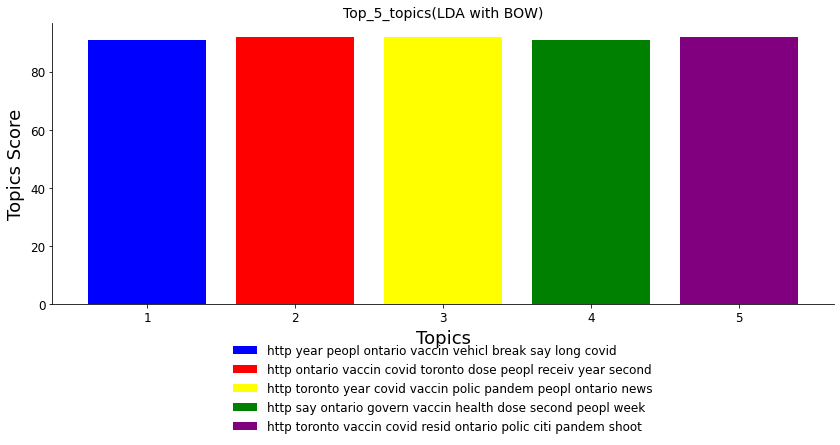

In [343]:
top5Topics_lda = Top5Topics(lda_model)
score = findLDAScore(lda_model, top5Topics_lda)

TopicsBarChart(top5Topics_lda, score, 'Top_5_topics(LDA with BOW)')


Score: 92	 
Topic: 0.029*"http" + 0.019*"ontario" + 0.018*"step" + 0.017*"reopen" + 0.015*"plan" + 0.014*"long"

Score: 91	 
Topic: 0.017*"pandem" + 0.013*"polic" + 0.013*"year" + 0.012*"ontario" + 0.012*"shoot" + 0.012*"covid"

Score: 92	 
Topic: 0.021*"vaccin" + 0.020*"covid" + 0.019*"need" + 0.018*"ontario" + 0.017*"toronto" + 0.015*"miss"

Score: 92	 
Topic: 0.024*"covid" + 0.020*"citi" + 0.020*"toronto" + 0.020*"case" + 0.019*"report" + 0.019*"ontario"

Score: 91	 
Topic: 0.022*"toronto" + 0.019*"polic" + 0.015*"million" + 0.015*"connect" + 0.014*"sit" + 0.014*"assault"


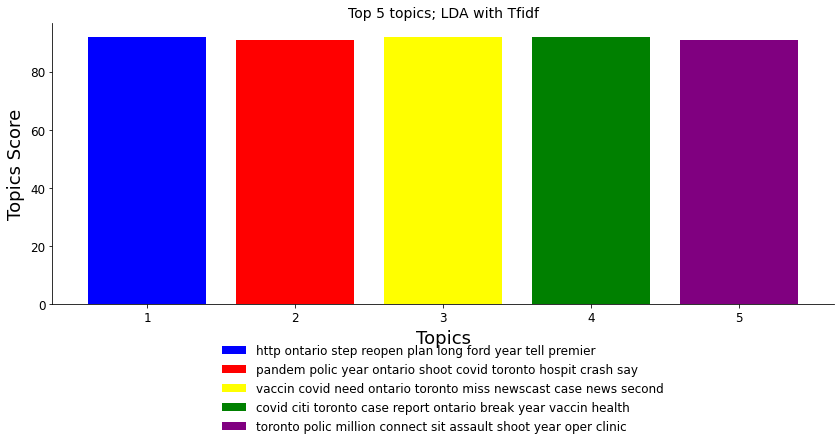

In [344]:
top5Topics_lda_tfidf = Top5Topics(lda_model_tfidf)
score = findLDAScore(lda_model_tfidf, top5Topics_lda_tfidf)

TopicsBarChart(top5Topics_lda_tfidf, score, 'Top 5 topics; LDA with Tfidf')